# this is to check effect of thermodynamic factors

In [25]:
import pybamm;import pandas as pd   ;import numpy as np;import os;import matplotlib.pyplot as plt;import os;#import imageio
from scipy.io import savemat,loadmat;from pybamm import constants,exp,sqrt;
import matplotlib as mpl; 
fs=17; # or we can set import matplotlib.pyplot as plt then say 'mpl.rc...'
import openpyxl
import traceback
import multiprocessing
font = {'family' : 'DejaVu Sans','size'   : fs}
mpl.rc('font', **font)

In [26]:
import sys  
str_path_0 = os.path.abspath(os.path.join(pybamm.__path__[0],'..'))
str_path_1 = os.path.abspath(os.path.join(str_path_0,"wip\Rio_Code\Fun_P3"))
sys.path.append(str_path_1) 
from Fun_P3 import *
BasicPath = 'D:/OneDrive - Imperial College London/SimDataSave/P3R11/'; 
Target  = 'CrateScan_TDF20/' 
if not os.path.exists(BasicPath + Target):
   os.mkdir(BasicPath + Target)

In [27]:
# Define 3 models: normal DFN, single transport by high Dec, double transport
Model_DFN  = pybamm.lithium_ion.DFN(options={
    "solvent diffusion": "single no consume wo refill",
    "electrolyte conductivity": "full"  ,}) 
Model_SD  = pybamm.lithium_ion.DFN(options={
    "solvent diffusion": "double spatial consume w refill",
    "electrolyte conductivity": "full"  ,}) 
Model_DD  = pybamm.lithium_ion.DFN(options={
    "solvent diffusion": "double spatial consume w refill",
    "electrolyte conductivity": "sol full"  ,}) 
Model_All =[ Model_DFN,  Model_SD, Model_DD ]
Str_model =[ 'Model_DFN',  'Model_SD', 'Model_DD' ]
# 3 parameter set: Andrew, constant. Valoen
Para_All = []
for i in range(1,5):
    para=pybamm.ParameterValues("Li2023_ECdrag")
    para.update({"EC Lithium ion cross diffusivity [m2.s-1]":1.5e-10})
    para.update({"EC initial concentration in electrolyte [mol.m-3]":6250})
    para.update({"Cation transference number":t_0plus_constant})
    para.update({"Electrolyte conductivity [S.m-1]":electrolyte_conductivity_Andrew2022})
    para.update({"Electrolyte diffusivity [m2.s-1]":electrolyte_diffusivity_Valoen2005Constant})
    Para_All.append(para)
Para_All[0].update({"1 + dlnf/dlnc":1})
Para_All[0].update({"TDF of EC":1})
Para_All[1].update({"1 + dlnf/dlnc":15})
Para_All[1].update({"TDF of EC":1})
Para_All[2].update({"1 + dlnf/dlnc":1})
Para_All[2].update({"TDF of EC":15})
Para_All[3].update({"1 + dlnf/dlnc":15})
Para_All[3].update({"TDF of EC":15})
Str_para = ['1-1', '15-1', '1-15', '15-15']

In [28]:
Rate_Dis_All = [0.5,2,4,6,8,10];  Rate_Cha_All = [1,]
# Str_para = ['Andrew', 'Constant', 'Valoen']
TDF_1_1_All = []; para = Para_All[0]; str_para = Str_para[0];
for model,str_model in zip(Model_All,Str_model):
    TDF_1_1_All.append(
        Scan_Crate(Rate_Dis_All,Rate_Cha_All,model,para,str_model,str_para)
        )

At t = 0.00568531 and h = 2.05271e-019, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00516548 and h = 1.97617e-020, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00568533 and h = 8.98175e-021, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00516547 and h = 1.25338e-019, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00493413 and h = 8.34954e-024, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00493413 and h = 9.66172e-020, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00246643 and h = 2.33405e-020, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00246643 and h = 2.38451e-020, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00246643 and h = 1.06903e-020, the corrector convergence failed repeatedly or with |h| = hmin.


In [29]:
TDF_15_1_All = []; para = Para_All[1]; str_para = Str_para[1];
for model,str_model in zip(Model_All,Str_model):
    TDF_15_1_All.append(
        Scan_Crate(Rate_Dis_All,Rate_Cha_All,model,para,str_model,str_para)
        )

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 0.00619996 and h = 4.89343e-013, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00300689 and h = 2.05502e-012, the corrector convergence failed repeatedly or with |h| = hmin.
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 0.00319645 and h = 2.81837e-014, the corrector convergence failed repeatedly or with |h| = hmin.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algori

In [30]:
TDF_1_15_All = []; para = Para_All[2]; str_para = Str_para[2];
for model,str_model in zip(Model_All,Str_model):
    TDF_1_15_All.append(
        Scan_Crate(Rate_Dis_All,Rate_Cha_All,model,para,str_model,str_para)
        )

At t = 0.00568531 and h = 2.09454e-019, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00516547 and h = 6.75295e-020, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00568532 and h = 1.77561e-019, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00516554 and h = 4.16079e-022, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00518527 and h = 1.32554e-019, the corrector convergence failed repeatedly or with |h| = hmin.
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 0.00490321, , mxstep steps taken before reaching tout.
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 0.00490257 and h = 1.01671e-020, the corrector convergence failed repeatedly or with |h| = hmin.
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 0.00243502 an

In [31]:
TDF_15_15_All = []; para = Para_All[3]; str_para = Str_para[3];
for model,str_model in zip(Model_All,Str_model):
    TDF_15_15_All.append(
        Scan_Crate(Rate_Dis_All,Rate_Cha_All,model,para,str_model,str_para)
        )

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 0.00603478 and h = 1.05882e-014, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00299601 and h = 9.69485e-013, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00299353 and h = 1.15937e-012, the corrector convergence failed repeatedly or with |h| = hmin.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
The lines

Text(0.5, 1.0, '$\\chi_e = 15, \\chi_{EC}=15$')

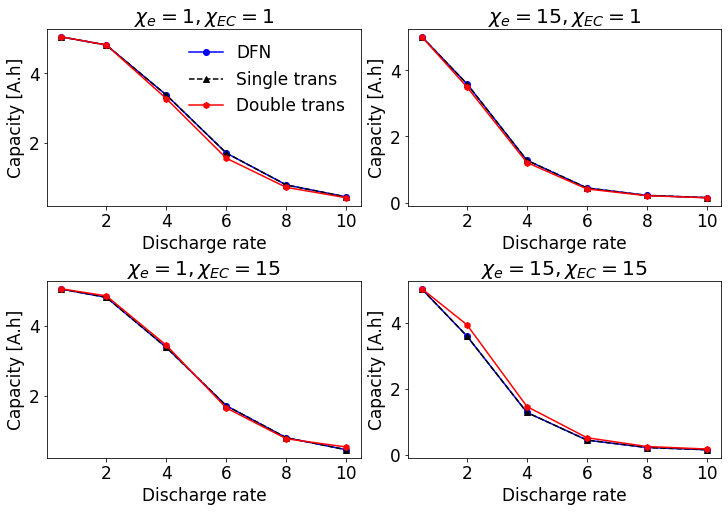

In [32]:
font = {'family' : 'DejaVu Sans','size'   : 17}
mpl.rc('font', **font)
Str=[ 'DFN',  'Single trans', 'Double trans' ]
fig, axs = plt.subplots(2,2,figsize=(10, 7), layout='constrained')
Colors = ['b','k','r',];LS = ['-','--','-'];MS=['o','^','h']
for i in range(0,3):
    axs[0,0].plot(Rate_Dis_All,TDF_1_1_All[i]['Cap_Dis_All'],color=Colors[i],linestyle=LS[i],marker = MS[i],label=Str[i])
    axs[0,1].plot(Rate_Dis_All,TDF_15_1_All[i]['Cap_Dis_All'],color=Colors[i],linestyle=LS[i],marker = MS[i],label=Str[i])
    axs[1,0].plot(Rate_Dis_All,TDF_1_15_All[i]['Cap_Dis_All'],color=Colors[i],linestyle=LS[i],marker = MS[i],label=Str[i])
    axs[1,1].plot(Rate_Dis_All,TDF_15_15_All[i]['Cap_Dis_All'],color=Colors[i],linestyle=LS[i],marker = MS[i],label=Str[i])
for m in range(0,2):
    for n in range(0,2):
        axs[m,n].set_xlabel("Discharge rate")
        axs[m,n].set_ylabel("Capacity [A.h]")

axs[0,0].legend(loc='best',frameon=False,)

axs[0,0].set_title(r'$\chi_e = 1, \chi_{EC}=1$',loc='center')
axs[0,1].set_title(r'$\chi_e = 15, \chi_{EC}=1$',loc='center')
axs[1,0].set_title(r'$\chi_e = 1, \chi_{EC}=15$',loc='center')
axs[1,1].set_title(r'$\chi_e = 15, \chi_{EC}=15$',loc='center')

In [33]:
# All cases contains: 3 para * 3 models * 11 C rates = 99 solutions  # for ageing, woundn't be c rates change, so 9 models 
# ['Andrew', 'Constant', 'Valoen']
# [ 'DFN',  'Single trans', 'Double trans' ]
# [0.5,1,2,3,4,5,6,7,8,9,10];  Rate_Cha_All = [1,]

# to access Andrew - DFN - 1C:
#type(Andrew_All[0]['MyDict_All'][1]['Solution'])
# to access Andrew - 'Double trans' - 1C:
#type(Andrew_All[2]['MyDict_All'][1]['Solution'])
# Andrew_All 5C


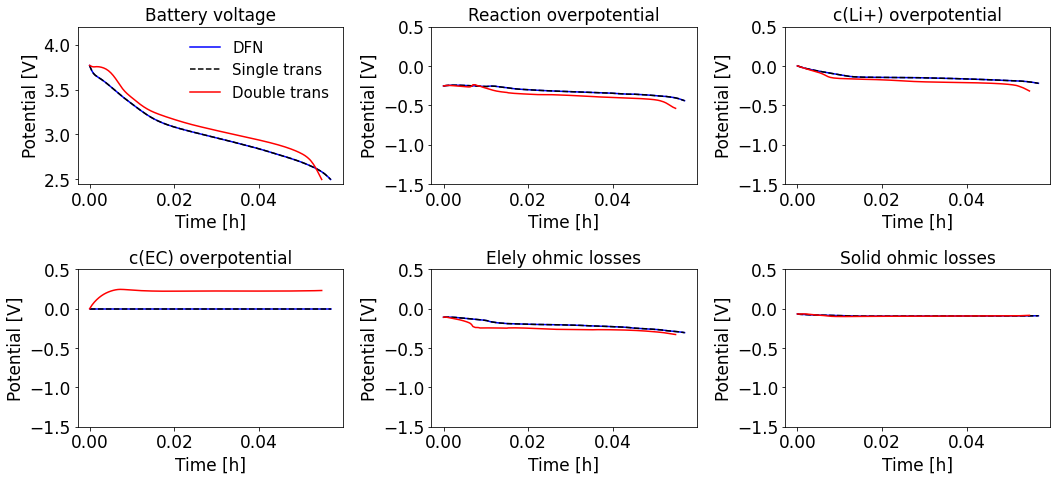

In [34]:
font = {'family' : 'DejaVu Sans','size'   : 17}
mpl.rc('font', **font)
Colors = ['b','k','r',];LS = ['-','--','-'];MS=['o','^','h'];Str=[ 'DFN',  'Single trans', 'Double trans' ]

fig, axs = plt.subplots(2,3, figsize=(15,7),tight_layout=True)
Keys_t_var = [
    "Battery voltage [V]",
    "X-averaged battery reaction overpotential [V]",
    "X-averaged battery concentration overpotential [V]",
    "X-averaged EC concentration overpotential [V]", # Mark Ruihe add
    "X-averaged battery electrolyte ohmic losses [V]",
    "X-averaged battery solid phase ohmic losses [V]",
]
Title_keys = [
    "Battery voltage",
    "Reaction overpotential",
    "c(Li+) overpotential",
    "c(EC) overpotential",
    "Elely ohmic losses",
    "Solid ohmic losses"
]
for k in range(0,3):
    sol = TDF_1_15_All[k]['MyDict_All'][3]['Solution']
    time_1 = sol.cycles[0].steps[1]['Time [h]'].entries-sol.cycles[0].steps[1]['Time [h]'].entries[0]
    for i in range(0,6): # 0 1 2 3 4 5 --> [0,0] [0,1], [0,2], [1,0], [1,1], [1,2]   
        var =  sol.cycles[0].steps[1][Keys_t_var[i]].entries
        if i < 3:
            m=0; n =i
        else:
            m=1; n=i-3
        axs[m,n].plot(time_1, var,color=Colors[k],linestyle=LS[k],label=Str[k]) # label="1st cycle"
        axs[m,n].set_title(Title_keys[i],fontdict={'family':'DejaVu Sans','size':fs})
        axs[m,n].set_ylabel("Potential [V]",   fontdict={'family':'DejaVu Sans','size':fs})
        axs[m,n].set_xlabel('Time [h]',   fontdict={'family':'DejaVu Sans','size':fs})
        axs[m,n].set_ylim(-1.5,0.5)
        
        labels = axs[m,n].get_xticklabels() + axs[m,n].get_yticklabels(); 
        [label.set_fontname('DejaVu Sans') for label in labels]
        axs[0,0].legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)  
    axs[0,0].set_ylim(2.45,4.2)

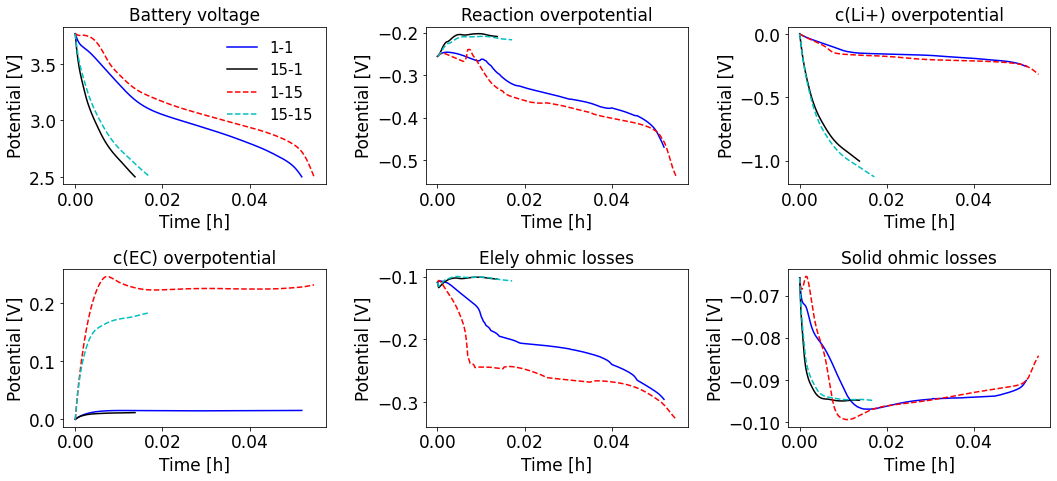

In [35]:
# for double diffusion only
TDF_All_All = [TDF_1_1_All,TDF_15_1_All,TDF_1_15_All,TDF_15_15_All]
font = {'family' : 'DejaVu Sans','size'   : 17}
mpl.rc('font', **font)
Colors = ['b','k','r','c'];LS = ['-','-','--','--'];MS=['o','^','h','v'];
Str=[ '1-1',  '15-1', '1-15', '15-15' ]

fig, axs = plt.subplots(2,3, figsize=(15,7),tight_layout=True)
Keys_t_var = [
    "Battery voltage [V]",
    "X-averaged battery reaction overpotential [V]",
    "X-averaged battery concentration overpotential [V]",
    "X-averaged EC concentration overpotential [V]", # Mark Ruihe add
    "X-averaged battery electrolyte ohmic losses [V]",
    "X-averaged battery solid phase ohmic losses [V]",
]
Title_keys = [
    "Battery voltage",
    "Reaction overpotential",
    "c(Li+) overpotential",
    "c(EC) overpotential",
    "Elely ohmic losses",
    "Solid ohmic losses"
]
for k in range(0,4):
    sol = TDF_All_All[k][2]['MyDict_All'][3]['Solution']
    time_1 = sol.cycles[0].steps[1]['Time [h]'].entries-sol.cycles[0].steps[1]['Time [h]'].entries[0]
    for i in range(0,6): # 0 1 2 3 4 5 --> [0,0] [0,1], [0,2], [1,0], [1,1], [1,2]   
        var =  sol.cycles[0].steps[1][Keys_t_var[i]].entries
        if i < 3:
            m=0; n =i
        else:
            m=1; n=i-3
        axs[m,n].plot(time_1, var,color=Colors[k],linestyle=LS[k],label=Str[k]) # label="1st cycle"
        axs[m,n].set_title(Title_keys[i],fontdict={'family':'DejaVu Sans','size':fs})
        axs[m,n].set_ylabel("Potential [V]",   fontdict={'family':'DejaVu Sans','size':fs})
        axs[m,n].set_xlabel('Time [h]',   fontdict={'family':'DejaVu Sans','size':fs})
        
        labels = axs[m,n].get_xticklabels() + axs[m,n].get_yticklabels(); 
        [label.set_fontname('DejaVu Sans') for label in labels]
        axs[0,0].legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)  

In [36]:
Plot_quick(TDF_15_1_All, 2, 12)

interactive(children=(FloatSlider(value=0.36755677552384164, description='t', max=0.4314759208055675, min=0.36…

interactive(children=(FloatSlider(value=0.36755677552384164, description='t', max=0.4314759208055675, min=0.36…

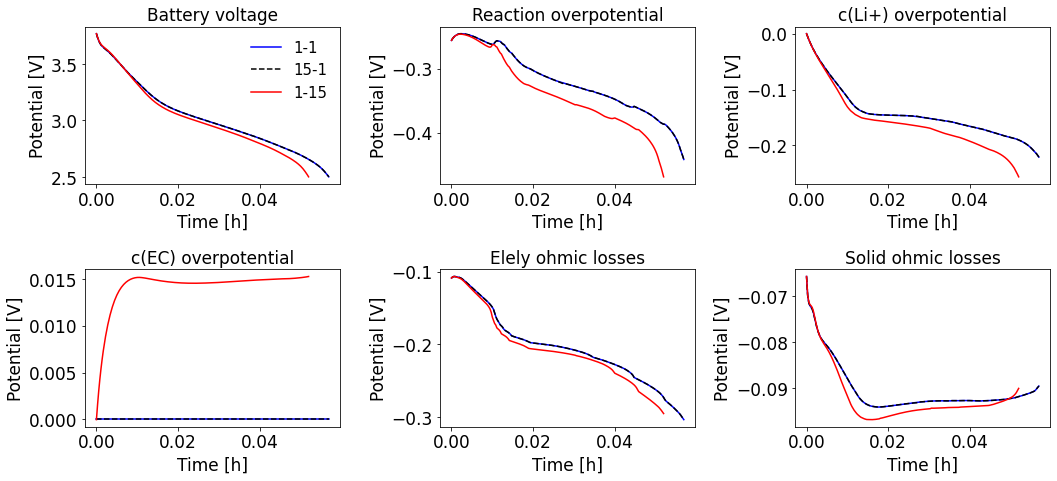

In [37]:
font = {'family' : 'DejaVu Sans','size'   : 17}
mpl.rc('font', **font)
Colors = ['b','k','r',];LS = ['-','--','-'];MS=['o','^','h'];
Str_=[ 'DFN',  'Single trans', 'Double trans' ]

fig, axs = plt.subplots(2,3, figsize=(15,7),tight_layout=True)
Keys_t_var = [
    "Battery voltage [V]",
    "X-averaged battery reaction overpotential [V]",
    "X-averaged battery concentration overpotential [V]",
    "X-averaged EC concentration overpotential [V]", # Mark Ruihe add
    "X-averaged battery electrolyte ohmic losses [V]",
    "X-averaged battery solid phase ohmic losses [V]",
]
Title_keys = [
    "Battery voltage",
    "Reaction overpotential",
    "c(Li+) overpotential",
    "c(EC) overpotential",
    "Elely ohmic losses",
    "Solid ohmic losses"
]
for k in range(0,3):
    sol = TDF_1_1_All[k]['MyDict_All'][3]['Solution']
    time_1 = sol.cycles[0].steps[1]['Time [h]'].entries-sol.cycles[0].steps[1]['Time [h]'].entries[0]
    for i in range(0,6): # 0 1 2 3 4 5 --> [0,0] [0,1], [0,2], [1,0], [1,1], [1,2]   
        var =  sol.cycles[0].steps[1][Keys_t_var[i]].entries
        if i < 3:
            m=0; n =i
        else:
            m=1; n=i-3
        axs[m,n].plot(time_1, var,color=Colors[k],linestyle=LS[k],label=Str[k]) # label="1st cycle"
        axs[m,n].set_title(Title_keys[i],fontdict={'family':'DejaVu Sans','size':fs})
        axs[m,n].set_ylabel("Potential [V]",   fontdict={'family':'DejaVu Sans','size':fs})
        axs[m,n].set_xlabel('Time [h]',   fontdict={'family':'DejaVu Sans','size':fs})
        
        labels = axs[m,n].get_xticklabels() + axs[m,n].get_yticklabels(); 
        [label.set_fontname('DejaVu Sans') for label in labels]
        axs[0,0].legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)  

In [38]:
ind = 0
OCV = Sol_All[ind].cycles[0].steps[0]["X-averaged battery open circuit voltage [V]"].entries
V_CELL    = Sol_All[ind].cycles[0].steps[0]["Battery voltage [V]"].entries
eta_react = Sol_All[ind].cycles[0].steps[0]["X-averaged battery reaction overpotential [V]"].entries
eta_grad_cLi = Sol_All[ind].cycles[0].steps[0]["X-averaged battery concentration overpotential [V]"].entries
eta_grad_cEC = Sol_All[ind].cycles[0].steps[0]["X-averaged EC concentration overpotential [V]"].entries
eta_Ohmic_e = Sol_All[ind].cycles[0].steps[0]["X-averaged battery electrolyte ohmic losses [V]"].entries
eta_Ohmic_s = Sol_All[ind].cycles[0].steps[0]["X-averaged battery solid phase ohmic losses [V]"].entries
Sum_1_wo_EC = OCV+eta_react+eta_grad_cLi+eta_Ohmic_e+eta_Ohmic_s;
Sum_2_w_EC  = Sum_1_wo_EC + eta_grad_cEC;
Time_1 =  Sol_All[ind].cycles[0].steps[0]["Time [h]"].entries

fig, ax = plt.subplots(figsize=(4, 2.7), layout='constrained')
ax.plot(Time_1,V_CELL, label = 'Ternimal Voltage')
ax.plot(Time_1,Sum_1_wo_EC,  label = 'Sum_1_wo_EC')
ax.plot(Time_1,Sum_2_w_EC, '--', label = 'Sum_2_w_EC')
ax.set_title("Check plot",loc='center')
ax.set_xlabel("Time [h]")
ax.set_ylabel("Potential [V]")
ax.legend()

fig, ax = plt.subplots(figsize=(4, 2.7), layout='constrained')
ax.plot(Time_1,V_CELL-Sum_1_wo_EC, label = 'ref')
ax.plot(Time_1,eta_grad_cEC,  label = 'grad_cEC')
ax.set_title("Check plot",loc='center')
ax.set_xlabel("Time [h]")
ax.set_ylabel("Potential [V]")
ax.legend()

NameError: name 'Sol_All' is not defined

In [ ]:
#label = ["Double transport wo Sol affect potential","Double transport w Sol affect potential",] 
label = ["Normal DFN"] 
output_variables3 = [
    [
        "X-averaged battery open circuit voltage [V]",
        
        "Battery voltage [V]",
    ],
    [
        "X-averaged battery reaction overpotential [V]",
        "X-averaged battery electrolyte ohmic losses [V]",
        "X-averaged battery solid phase ohmic losses [V]",
    ],
    [
        "X-averaged battery concentration overpotential [V]",
        "X-averaged EC concentration overpotential [V]", # Mark Ruihe add
    ],
]
quick_plot = pybamm.QuickPlot(
    [
        Andrew_All[i]['MyDict_All'][5]['Solution'].cycles[0].steps[1] for i in range(0,1)
    ], 
    output_variables3,label,variable_limits='tight',
    time_unit='hours',
    spatial_unit='mm',   figsize = (18,6),  #  (“m”, “mm”, or “um”)
    n_rows=1) #
quick_plot.dynamic_plot()

In [ ]:
font = {'family' : 'DejaVu Sans','size'   : 11}
mpl.rc('font', **font)
pybamm.plot_voltage_components(Sol_All[0].cycles[0].steps[0])
pybamm.plot_voltage_components(Sol_All[1].cycles[0].steps[0])
pybamm.plot_voltage_components(Sol_All[2].cycles[0].steps[0])

In [ ]:
label = ["Normal DFN","Single transport","Double transport",] 
output_variables3 = [
    "EC concentration",
    "c(EC) over c(Li+)",
    "Minus div EC flux",
    "Minus div EC flux by diffusion",
    "Minus div EC flux by migration",
    "Minus div EC flux by Li+",
]
quick_plot = pybamm.QuickPlot(
    [
        sol.cycles[0].steps[0] for sol in Sol_All
    ], 
    output_variables3,label,variable_limits='fixed',
    time_unit='hours',
    spatial_unit='mm',     #  (“m”, “mm”, or “um”)
    n_rows=2) #figsize = (18,12),
quick_plot.dynamic_plot()

In [ ]:
label = ["Normal DFN","Single transport","Double transport",] 
output_variables3 = [
    "Electrolyte concentration",
    "Minus div Li+ flux",
    "Li+ source term",
    "Minus div Li+ flux by diffusion",
    "Minus div Li+ flux by migration",
    "Minus div Li+ flux by solvent",
]
quick_plot = pybamm.QuickPlot(
    [
        sol.cycles[0].steps[0] for sol in Sol_All
    ],  output_variables3,label,variable_limits='fixed',
    time_unit='hours',
    spatial_unit='mm',     #  (“m”, “mm”, or “um”)
    n_rows=2) #figsize = (18,12),
quick_plot.dynamic_plot()

In [ ]:
Plot_Last_Single_Step(Sol_2,0,0,BasicPath, Target,1,1,'False',"cool",17,200)

In [ ]:
Plot_Last_Single_Step(Sol_1,0,0,BasicPath, Target,1,1,'False',"cool",17,200)